# 🐵 Face Expression Classification

[Face Expression Classification - Repo | officialpm](https://github.com/officialpm/Face-Expression-Classification-CNN)

####**`💚 Developed by`** [Nikita ](https://github.com/officialpm)

<div>
<a href="https://twitter.com/Nikitacodes">
  <img   align="left" alt="Nikita | Twitter" width="22px"  src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/Nikitadmaniar/">
  <img align="left" alt="Nikita's LinkdeIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/Nikitamaniar">
  <img align="left" alt="Nikita's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>
<a href="https://www.instagram.com/Nikit/">
  <img align="left" alt="Nikita's Instagram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/instagram.svg" />
</a>
</div>
<br/>


---


## `• Problem`

Identifying the face expression of a human, given an image of him/her.

## `• Data`
  
Data is taken from Kaggle's Facial Expression Recognition Challenge:
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


## `• Evaluation`

Evaluation is done based on accuracy and loss between predicted expression and actual expression.

## `• Features`

Some information about the data:
* We're dealing with images(unstructured data), so its better we use deep learning / transfer learning.
* Dataset has **3** columns namely emotions, picture, and usage(Training/Testing).
* Dataset has **35887** rows(images).
* There are **28709** training images (with column value as Training).
* There are **3589** testing images (with column value as PublicTest).
* Dataset has **7 classes** (emotions).
  * 0 -> Angry
  * 1 -> Disgust
  * 2 -> Fear
  * 3 -> Happy
  * 4 -> Sad
  * 5 -> Surprise
  * 6 -> Neutral


## Initializing

In [1]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
!git-lfs clone https://github.com/officialpm/Face-Expression-Classification-CNN

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'Face-Expression-Classification-CNN'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 49 (delta 7), reused 5 (delta 5), pack-reused 40
Unpacking objects: 100% (49/49), done.
Git LFS: (1 of 1 files) 287.13 MB / 287.13 MB


In [3]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

base_path = "Face-Expression-Classification-CNN"
%matplotlib inline

### Check GPU

In [4]:
# Check for GPU availability
print("Hey Nikta, GPU ", "available :) !!" if tf.config.list_physical_devices("GPU") else "not available :(")

Hey Nikta, GPU  available :) !!


##Data

In [5]:
raw_df = pd.read_csv(f"{base_path}/Data/fer2013.csv")

## Creating Train and Test Datasets

### Initialize the total number of classes

In [6]:
# Initialize the total number of classes
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral

### Initialize training and test datasets

In [7]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y) #NORMALIZE
    return X, Y

In [8]:
X, Y = getData(f"{base_path}/Data/fer2013.csv")
num_class = len(set(Y))
print(num_class)

7


In [9]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


### Reshape the inputs

In [11]:
# Reshape each value from 1D(28709) to 3D(48,48,1)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

32298 train samples
3589 test samples


In [12]:
X_train.shape

(32298, 48, 48, 1)

## Construct a CNN (Convolutional Neural Network)

Here we can start with Keras-Sequential as our base model.
https://keras.io/api/models/sequential/

### Create a model

In [16]:
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization
model = Sequential()
input_shape = (48,48,1)

#CNN 1
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#CNN 2
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#CNN 2
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Full Connected 
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_23 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_13 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 128)      

## Fit the model

In [19]:
# Assign number of epochs
epochs = 40 #@param{type:"slider", min:0, max:250, step:10}

In [20]:
modelPath=f'{base_path}/Models/Face_Expression_Classfication_model.h5' # save model at this location after each epoch
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=epochs, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=modelPath),
            ]
            )

Epoch 1/40
505/505 [==============================] - 35s 43ms/step - loss: 1.6855 - accuracy: 0.3451 - val_loss: 1.5692 - val_accuracy: 0.4060
Epoch 2/40
505/505 [==============================] - 20s 39ms/step - loss: 1.3348 - accuracy: 0.4892 - val_loss: 1.3409 - val_accuracy: 0.4857
Epoch 3/40
505/505 [==============================] - 19s 38ms/step - loss: 1.1492 - accuracy: 0.5638 - val_loss: 1.1545 - val_accuracy: 0.5570
Epoch 4/40
505/505 [==============================] - 20s 39ms/step - loss: 1.0229 - accuracy: 0.6180 - val_loss: 1.1403 - val_accuracy: 0.5662
Epoch 5/40
505/505 [==============================] - 19s 39ms/step - loss: 0.8927 - accuracy: 0.6706 - val_loss: 1.2039 - val_accuracy: 0.5520
Epoch 6/40
505/505 [==============================] - 20s 39ms/step - loss: 0.7516 - accuracy: 0.7232 - val_loss: 1.1542 - val_accuracy: 0.5901
Epoch 7/40
505/505 [==============================] - 19s 38ms/step - loss: 0.5992 - accuracy: 0.7822 - val_loss: 1.2323 - val_accuracy:

## Load the saved model

We can load the model in two ways:
* Using Keras `load_model()`
* Using Pickle `load()`

The loaded model can be directly used of prediction.

In [21]:
import pickle

# Load a model using Keras or Pickle

def load_model(load_method='Keras'):
  model = None
  if load_method == 'Keras':
    # Method 1: Using Keras
    model = keras.models.load_model(modelPath)
  elif load_method == 'Pickle':
    # Method 2: Using Pickle
    with open(modelPath, 'rb') as f:
      model = pickle.load(f)
  
  print("Model Loaded.")
  return model

In [22]:
loaded_model = load_model(load_method='Keras')

Model Loaded.


## Evaluate the trained model

Use the `evaluate()` method to evalute the trained model against train and test dataset

In [23]:
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train loss : {train_score[0]}")
print(f"Train accuracy : {train_score[1]}")
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss : {test_score[0]}")
print(f"Test accuracy : {test_score[1]}")

1010/1010 [==============================] - 10s 9ms/step - loss: 0.0215 - accuracy: 0.9927
Train loss : 0.021471107378602028
Train accuracy : 0.9927240014076233
113/113 [==============================] - 1s 8ms/step - loss: 3.0418 - accuracy: 0.6133
Test loss : 3.041792154312134
Test accuracy : 0.6132627725601196


### Function to analyze and plot the prediction results

In [24]:
def analyze_emotion(emotions):
  label_values = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_seq = np.arange(len(label_values))
  fig, ax = plt.subplots()
  ax.bar(y_seq, emotions, align='center', alpha=0.5)
  ax.set_xticks(y_seq)
  ax.set_xticklabels(label_values, color='black')
  ax.set_ylabel("Percentage", color='black')
  ax.set_title("Emotion", color='black')
  plt.show()

### Confusion Matrix

Plotting a confusin matrix between predicted labels and truth(ground) labels

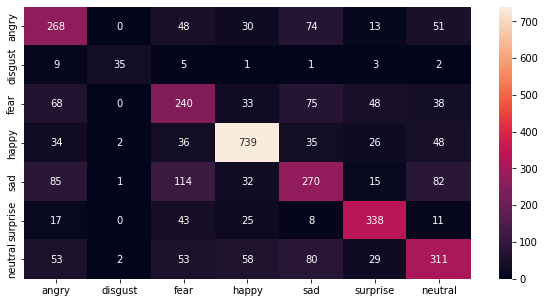

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

label_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
label_values = [0,1,2,3,4,5,6]

# Make a predictions predictions list
y_preds = loaded_model.predict(X_test)
y_preds_mod, y_test_mod = [], []

for pred in y_preds:
  y_preds_mod.append(np.argmax(pred))

for truth in y_test:
  y_test_mod.append(np.argmax(truth))

# Create a confusion matrix
cm = confusion_matrix(y_test_mod, y_preds_mod, labels=label_values)

# Visualize the confusion matrix using Seaborn heatmap
df_cm = pd.DataFrame(cm,
                     index=label_names,
                     columns=label_names)
plt.figure(figsize=(10,5))
sn.heatmap(df_cm, annot=True, fmt='g');

## Testing with custom (external) data


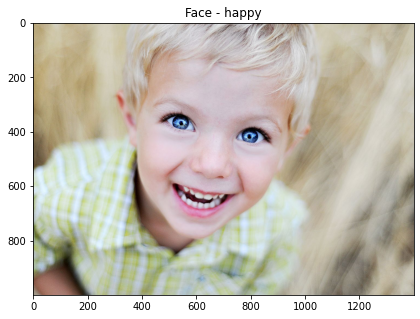

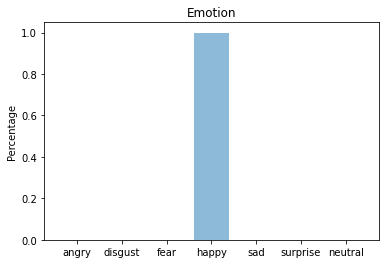

In [26]:
file = f"{base_path}/Data/Images/happy-baby2.jpg"
actual_image = image.load_img(file)
img = image.load_img(file, color_mode='grayscale', target_size=(48,48))

X_custom = image.img_to_array(img)
X_custom = np.expand_dims(X_custom, axis=0)

X_custom /= 255

y_custom = loaded_model.predict(X_custom)

m=0.000000000000000000001
a=y_custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(actual_image)
ax.set_title(f'Face - {label_names[ind]}');

analyze_emotion(y_custom[0])